In [1]:
import numpy as np
import pytest
import torch

from fragile.optimize.models import NormalContinuous
from fragile.optimize.mapper import FunctionMapper
from fragile.optimize.encoder import Vector
from fragile.optimize.benchmarks import EggHolder, StyblinskiTang, LennardJones
from fragile.optimize.models import EncoderSampler, BestDtEncoderSamper, NormalContinuous
same = lambda x: torch.ones(len(x)).reshape(-1,1) * 10 #*  - torch.sum(x ** 2, 1)
%matplotlib inline

In [2]:
from fragile.core.utils import to_numpy, to_tensor

   

In [7]:
n_atoms = 25
n_vectors = n_atoms * 3
model = lambda x: NormalContinuous(
    high=np.array([1.1] * n_vectors), low=np.array([-1.1] * n_vectors), env=x, shape=None,
   # high=np.array([512] * n_vectors), low=np.array([-512] * n_vectors), env=x, shape=None,
    loc=0.,
    scale=0.01, 
    mean_dt=1,
    std_dt=0,
    min_dt=1, max_dt=1,
)

In [8]:
reward_scale=3
pest_scale=0.1
distance_scale=1

In [9]:

plot_every = 100
swarm = FunctionMapper(
        n_vectors=15,
        env = lambda: LennardJones(n_atoms=n_atoms),#StyblinskiTang((n_vectors,)),
        model=model,
        n_walkers=250,
        timeout=50000000,
        timeout_threshold=20000000,
        reward_scale=1,
        _accumulate_rewards=False,
        plot_steps=True,
        pest_scale=0.25,
        distance_scale=1,
    plot_every=plot_every, 
    )

(75,)


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


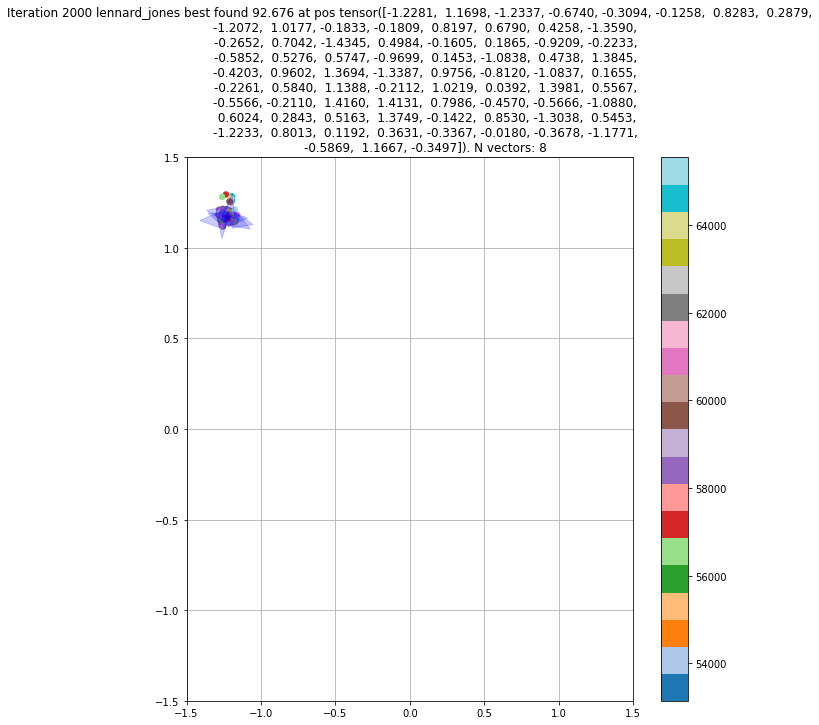

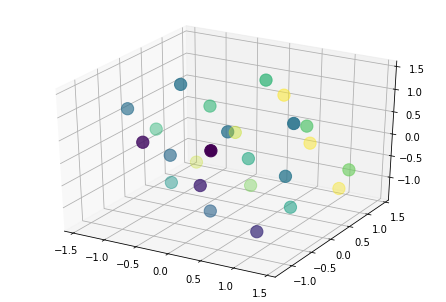

Best reward found: 92.67590 at position: tensor([-1.2281,  1.1698, -1.2337, -0.6740, -0.3094, -0.1258,  0.8283,  0.2879,
        -1.2072,  1.0177, -0.1833, -0.1809,  0.8197,  0.6790,  0.4258, -1.3590,
        -0.2652,  0.7042, -1.4345,  0.4984, -0.1605,  0.1865, -0.9209, -0.2233,
        -0.5852,  0.5276,  0.5747, -0.9699,  0.1453, -1.0838,  0.4738,  1.3845,
        -0.4203,  0.9602,  1.3694, -1.3387,  0.9756, -0.8120, -1.0837,  0.1655,
        -0.2261,  0.5840,  1.1388, -0.2112,  1.0219,  0.0392,  1.3981,  0.5567,
        -0.5566, -0.2110,  1.4160,  1.4131,  0.7986, -0.4570, -0.5666, -1.0880,
         0.6024,  0.2843,  0.5163,  1.3749, -0.1422,  0.8530, -1.3038,  0.5453,
        -1.2233,  0.8013,  0.1192,  0.3631, -0.3367, -0.0180, -0.3678, -1.1771,
        -0.5869,  1.1667, -0.3497]), and 176 cloned_vectors 
 Encoder: 
 Encoder with 15 vectors, score -1.000, -1 different hashes and 7 available spaces
MapperWalkers iteration 2001
Total Reward: Mean: 90.456, Std: 0.466, Max: 92.676 Min

In [10]:
swarm.walkers.reset()
swarm.reset()
swarm.walkers.max_iters = 10000
_ = swarm.run_swarm(print_every=plot_every)

In [25]:
bases = swarm.encoder.get_bases()

In [70]:
swarm.walkers.reset()
swarm.reset()

In [71]:
swarm.walkers.reset()

In [8]:
swarm.walkers.observs.shape

torch.Size([250, 9])

In [73]:
from fragile.optimize.benchmarks import styblinski_tang


In [121]:
best = swarm.walkers.observs[swarm.walkers.rewards.argmax()].detach().clone()
optim = torch.optim.LBFGS([swarm.walkers.observs])

In [122]:
best, closure()

tensor(-10.7149)


(tensor([-0.4478,  1.8925,  3.7959]), tensor(-10.7149))

In [123]:
def closure():
  
    loss = (-styblinski_tang(swarm.walkers.observs)).mean()
    print(loss)
    optim.zero_grad()
    #loss.backward()
    return loss

In [124]:
for i in range(10):
    optim.step(closure)

tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)
tensor(-10.7149)


In [125]:
optim.state

defaultdict(dict, {tensor([[ 4.1844e+00,  9.9291e-02,  4.6208e+00],
                     [-1.2689e+00, -4.6875e+00, -4.4542e+00],
                     [ 1.1409e+00, -3.4658e+00, -1.5880e+00],
                     [ 4.0272e+00,  5.4593e-01, -3.4633e-01],
                     [-2.6021e-01, -1.2523e+00, -2.8864e+00],
                     [ 1.6820e+00,  3.1702e-01,  9.8733e-01],
                     [-4.6645e+00,  6.9850e-01, -4.3020e+00],
                     [-4.2056e+00,  3.8060e+00, -3.7335e+00],
                     [ 1.6335e+00,  4.6444e+00,  3.2997e+00],
                     [ 4.6314e+00,  2.2764e+00, -1.5904e+00],
                     [-4.3117e+00, -3.6732e-01, -4.9712e+00],
                     [-1.9627e+00, -3.8214e+00, -2.2769e+00],
                     [ 4.4393e+00, -8.5502e-01,  4.6055e+00],
                     [ 1.9590e-02, -4.1481e+00, -3.9974e+00],
                     [-2.2484e+00,  3.6853e+00,  1.2443e+00],
                     [-3.1173e+00, -3.5954e+00,  2.1969e-01],
  

In [100]:
optim.step()

TypeError: step() missing 1 required positional argument: 'closure'

In [ ]:
bases_noise * bases.mean(0)

In [ ]:
swarm.walkers.raw_pest

In [ ]:
import matplotlib.pyplot as plt
from fragile.core.utils import to_numpy
def vector_to_arrow(v):
    x, y = v.origin[0], v.origin[1]
    dx, dy = v.end[0] - x, v.end[1] - y
    plt.arrow(float(x), float(y), float(dx), float(dy), width=0.02, color="red")

In [ ]:
plt.cm.copper

In [ ]:
x, y, dx, dy = vector_to_arrow(swarm.encoder.vectors[-1])

In [ ]:
x, y

In [ ]:
plt.arrow(x, y, 1, 1, width=3)

In [ ]:
x, y, rewards = swarm.visited_x, swarm.visited_y, swarm.visited_rewards

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.scatter(x, y, c=rewards, cmap=plt.cm.viridis, alpha=0.1)
vals = to_numpy(swarm.walkers.observs)
plt.scatter(vals[:, 0], vals[:, 1])
_ = [vector_to_arrow(v) for v in swarm.encoder.vectors]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import clear_output
%matplotlib inline
plt.axis([0, 10, 0, 1])

for i in range(10):
    y = np.random.random()
    plt.scatter(i, y)
    plt.pause(0.05)
    clear_output(True)

plt.show()

In [ ]:
vals = to_numpy(swarm.walkers.observs)
plt.scatter(vals[:, 0], vals[:, 1])

In [ ]:
vecs = torch.stack([torch.cat((v.origin, v.end)) for v in swarm.encoder.vectors])

X0, X1 = vecs[:, 0].numpy().flatten(), vecs[:, 1].numpy().flatten()
Y0, Y1 = vecs[:, 2].numpy().flatten(), vecs[:, 3].numpy().flatten()

U = X1 - X0
V = Y1 - Y0

plt.quiver(X, Y, U, V, color="red")

In [ ]:
plt.quiver(U, V)

In [ ]:
swarm.step_walkers()

In [ ]:
len(swarm.walkers.encoder)

In [ ]:
swarm.walkers.balance()

In [ ]:
np.unique(swarm.walkers.encoder.encode(swarm.walkers.observs).numpy(),axis=0)

In [ ]:
co = Counter([str(np.arange(20)), str(np.arange(20))])

In [ ]:
co

In [ ]:
torch.stack((torch.arange(20), torch.arange(20))).shape

In [ ]:
def diversity_score(x, total=None):
    n_different_rows = np.unique(to_numpy(x), axis=0).shape[0]
    return n_different_rows if total is None else float(n_different_rows / total)

In [ ]:
diversity_score(swarm.walkers.observs)

In [ ]:
miau = str([10])
type(miau.__hash__())

In [ ]:
[hash(v) for v in swarm.walkers.encoder.vectors]

In [ ]:
rewards = self.processed_rewards.float() ** self.reward_scale.float()
dist = self.distances.float() ** self.dist_scale.float()
virtual_reward = rewards * dist

In [ ]:
A = np.array([[1, 1, 1, 0, 1, 1],
              [1, 1, 1, 0, 1, 1],
              [1, 3, 3, 0, 1, 3]])


In [ ]:
np.unique(A, axis=0).shape[0]

In [ ]:
rewards.shape

In [ ]:
swarm.env.are_in_bounds(swarm.walkers.observs)


In [ ]:
swarm.walkers

In [ ]:
super(Swarm, swarm).__repr__()

In [ ]:
from fragile.core.swarm import Swarm

In [6]:
swarm.walkers.raw_pest

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [n